## 1. Introduction to summary statistics: The sample mean and median
We have seen that histograms, bee swarm plots, and ECDFs provide effective summaries of data. But we often would like to summarize data even more succinctly, say in one or two numbers. These numerical summaries are not by any stretch a substitute for the graphical methods we have been employing, but they do take up a lot less real estate.
### 1.1. Theory.
#### 2008 US swing state election results
Let's go back to the election data from the swing states again. If we could summarize the percentage of the votes for Obama at the county level in Pennsylvania in one number, what would we choose? The first number that pops into my mind is the mean. The mean for a given state is just the average percentage of votes over the counties. If we add the means as horizontal lines to the bee swarm plot, we see that they are a reasonable summary of the data.
#### Mean vote percentage
To compute the mean of a set of data, we use the `np.mean` function, here used to compute the mean county-level vote for Obama in Pennsylvania. 
>- To put it precisely, the mean, written here as `x-bar`, is the sum of all the data, divided by the number `n` of data points. 
$$ \bar{x} = \dfrac{1}{n} \sum_{i=1}^n x_i. $$
>- Now, the mean is a useful statistic and easy to calculate, but a major problem is that it is heavily influenced by outliers, **or data points whose value is far greater or less than most of the rest of the data**. 
#### 2008 Utah election results.
Consider the county-level votes for Utah in the 2008 election. There are five counties that have high vote share for Obama, one of which has almost 60%. Even though the majority of the counties in Utah had less than 25% voting for Obama, these anomalous counties pull the mean higher up. So, when we compute the mean, we get about 28%. We might like a summary statistic that is immune to extreme data.

#### The median
The median provides exactly that. The median is the middle value of a data set. It is defined by how it is calculated: sort the the data and choosing the datum in the middle. Because it is derived from the ranking of sorted data, and not on the values of the data, the median is immune to data that take on extreme values.

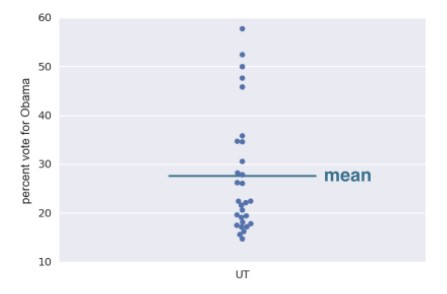

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

- Here it is displayed on the bee swarm plot. It is not tugged up by the counties with large fraction of votes for Obama.

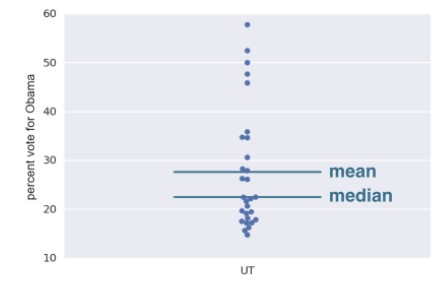

In [2]:
## Hình minh họa Image(fig1, height, width)

- The median is computed by simply calling the `np.median` function.

### 1.2. PRACTICES
#### Exercise 1.2.1. Means and medians
Which one of the following statements is true about `means` and `medians`?
>- A. An outlier can significantly affect the value of both the mean and the median.
>- B. An outlier can significantly affect the value of the mean, but not the median.
>- C. Means and medians are in general both robust to single outliers.
>- D. The mean and median are equal if there is an odd number of data points.
#### Answers & explaination.
>- A. Wrong! To illustrate the effect of an outlier, try computing the `mean` and `median` of this: `np.array([0.9, 1.1, 0.8, 1.3, 1.2])` and also the median and mean of this: `np.array([0.9, 1.1, 0.8, 1.3, 1000.0])` with `outlier = 1000.0`.

In [3]:
import numpy as np
arr1 = np.array([0.9, 1.1, 0.8, 1.3, 1.2])
arr2 = np.array([0.9, 1.1, 0.8, 1.2, 1000])

print('Array1,\t mean = %s,\t median = %s'%(np.mean(arr1), np.median(arr1)))
print('Array2,\t mean = %s,\t median = %s'%(np.mean(arr2), np.median(arr2)))

Array1,	 mean = 1.06,	 median = 1.1
Array2,	 mean = 200.8,	 median = 1.1


>- **B. Correct!!**
>- C. Incorrect!! Again, let's consider the illustration in `option A`.
>- D. Wrong!! The number of data points has nothing to do with equality of mean and median, look at the following example.

In [4]:
odd_vec = np.array([1, 3, 101])
print('mean = %s, \t median = %s'%(np.mean(odd_vec), np.median(odd_vec)))

mean = 35.0, 	 median = 3.0


#### Exercise 1.2.2. Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using `np.mean()`.

Compute the mean `petal length` of `Iris versicolor` from Anderson's classic data set. The variable `versicolor_petal_length` is provided in your namespace. Assign the mean to `mean_length_vers`.

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
versicolor_petal_length = iris['data'][50:100, 2]

# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## 2. Percentiles, outliers, and box plots
### 2.1. Theory.
>- The **median** is a special name for the `50th percentile`; that is 50% of the data are less than the `median`.
>- Similarly, the `25th percentile` is the value of the data point that is `greater than 25%` of the sorted data, and so on for any other percentile we want. 
>- `Percentiles` are useful summary statistics, and can be computed using `np.percentile`

We just pass a list of the `percentiles` we want (`percentiles`, not fractions), and it returns the data that match those percentiles. We can do this for all of the swing states.

#### Computing percentiles
Let's compute the `25th`, `50th`, and `75th percentiles`. We now have three `summary statistics`. Now the whole point of `summary statistics` was to keep things concise, but we're starting to get a lot of numbers here. Dealing with this issue is where `quantitative EDA` meets `graphical EDA`.


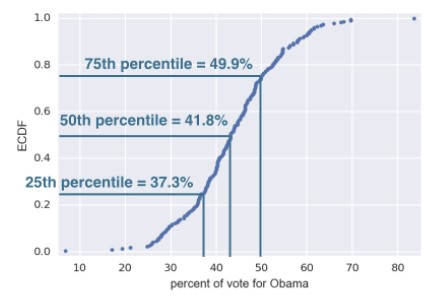

In [6]:
## Hình minh họa Image(fig1, height, width)

#### 2008 US election box plot
`Box plots` were invented by John Tukey himself to display some of the salient features of a data set based on `percentiles`.

Here, we see a `box plot` showing Obama's vote share from states east and west of the Mississippi River. 
>- The center of box is the `median`, which we know is the `50th percentile` of the data. 
>- The edges of the boxes are the `25th` and `75th` percentile. 
>- The total height of the box contains the `middle 50%` of the data, and is called the `interquartile range`, or `IQR`. 
>- The `whiskers` extend a distance of `1-point-5 times` the IQR, or to the extent of the data, whichever is more extreme. 
>- Finally, any points **outside of the whiskers** are plotted as individual points, which we often demarcate as `outliers`. 

While there is no single definition for an outlier, being more than `2 IQRs` or `1.5 IQR` away from the `median` is a `common criterions`. 

It is important to remember that an outlier is not necessarily an erroneous data point. You should not assume an outlier is erroneous unless you have some known reason to. 

Since there is zero evidence of any substantial voter fraud in the United States, these outliers are not erroneous. They are just data points with extreme values. 

When the number of data are very large and bee swarm plots are too cluttered, box plots are a great alternative. It makes sense, then, that constructing a box plot using Seaborn is exactly the same as making a bee swarm plot; we just use sns dot boxplot. And of course we never forget to label the axes.

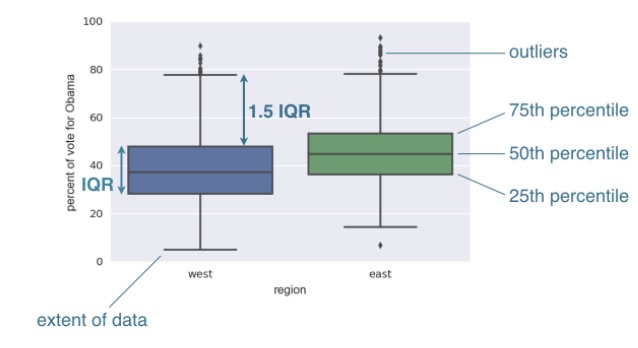

In [7]:
## Hình minh họa Image(fig1, height, width)

### 2.2. PRACTICES.
#### Exercise 2.2.1. Computing percentiles
In this exercise, you will compute the `percentiles` of `petal length` of `Iris versicolor`.
- Create `percentiles`, a `NumPy array` of percentiles you want to compute. These are the `2.5th`, `25th`, `50th`, `75th`, and `97.5th`. You can do so by creating a list containing these `ints/floats` and convert the list to a `NumPy array` using `np.array()`. For example, `np.array([30, 50])` would create an array consisting of the `30th` and `50th percentiles`.
- Use `np.percentile()` to compute the percentiles of the petal lengths from the `Iris versicolor` samples. The variable `versicolor_petal_length` is in your namespace.
- Print the `percentiles`.

#### SOLUTION.

In [8]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


#### Exercise 2.2.2. Comparing percentiles to ECDF
To see how the percentiles relate to the `ECDF`, you will plot the percentiles of `Iris versicolor petal lengths` you calculated in the `last exercise` on the `ECDF plot` you generated in [chapter 1](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Testing%20Hypothesis/Statistical%20Thinking/Graphical%20exploratory%20data%20analysis.ipynb). The `percentile` variables from the previous exercise are available in the workspace as `ptiles_vers` and `percentiles`.

Note that to ensure the `Y-axis` of the `ECDF` plot remains between `0` and `1`, you will need to rescale the `percentiles array` accordingly - in this case, dividing it by `100`.

**Recall the function**

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

x_vers, y_vers = ecdf(versicolor_petal_length)

#### SOLUTION.

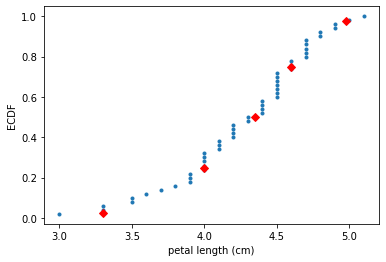

In [10]:
import matplotlib.pyplot as plt

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', 
             color='red', linestyle='none')

# Show the plot
plt.show()

#### Exercise 2.2.3. Box-and-whisker plot
Making a box plot for the `petal lengths` is unnecessary because the iris data set is not too large and the bee `swarm plot` works fine. However, it is always good to get some practice. Make a `box plot` of the `iris petal lengths`. You have a `pandas DataFrame`, `df`, which contains the `petal length` data, in your namespace. Inspect the data frame df in the IPython shell using `df.head()` to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:

        _ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
        _ = plt.xlabel('region')
        _ = plt.ylabel('percent of vote for Obama')

In the IPython Shell, you can use sns.boxplot? or help(sns.boxplot) for more details on how to make box plots using seaborn.

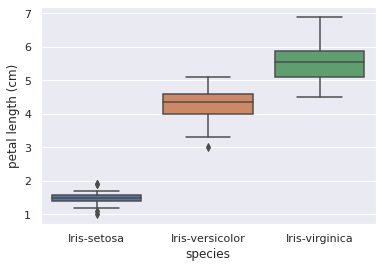

In [11]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'../input/iris/Iris.csv')

# Create box plot with Seaborn's default settings
sns.set()
_ = sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

## 3. Variance and standard deviation
### 3.1. Theory
Once again, let's look at the 2008 swing state data on the county level and think about other summary statistics we can calculate. 

In this bee swarm plot, I also show the means of each state with a horizontal line. In looking at this plot, the mean seems to capture the magnitude of the data, but what about the variability, or the spread, of the data? Florida seems to have more county-to-county variability than Pennsylvania or Ohio.

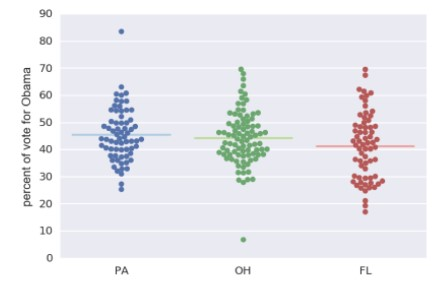

In [12]:
## Hình minh họa Image(fig1, height, width)

#### Variance.
We can quantify this spread with the variance. The variance is the average of the squared distance from the mean. That definition was a mouthful. Let's parse that more carefully with a graphical example, looking specifically at Florida.

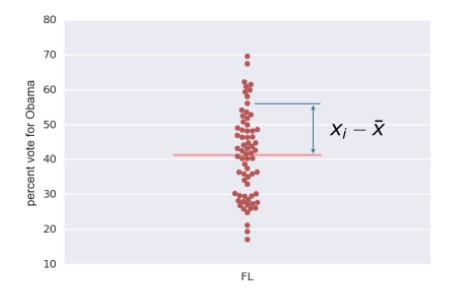

In [13]:
## Hình minh họa Image(fig1, height, width)

#### Computing the variance & standard deviation.
$$ \displaystyle \text{var(iance)} = \dfrac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2 $$
- Calculation of the `variance` is implemented in the `np.var` function. Now, because the calculation of the variance involves squared quantities, it does not have the same units of what we have measured, in this case the vote share for Obama. 
- Therefore, we are interested in the **square root of the variance**, which is called the `standard deviation`. This is calculated with the `np.std` function, and the results are the same as taking the square root of the variance.

When we look at the swarm plot, it is clear that the standard deviation is a reasonable metric for the typical spread of the data.

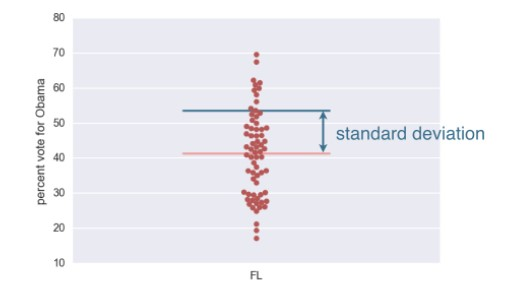

In [14]:
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICES.
#### Exercise 3.2.1.  Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute `variances`, this is a beginner course that does not assume so.

In this exercise, we will explicitly compute the `variance` of the `petal length` of `Iris veriscolor` using the equations discussed in the videos. We will then use `np.var()` to compute it.
#### SOLUTION

In [15]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


#### Exercise The standard deviation and the variance
As mentioned in the theory, the `standard deviation` is the **square root of the `variance`**.

You will see this for yourself by computing the standard deviation using `np.std()` and comparing it to what you get by computing the variance with `np.var()` and then computing the square root.
#### SOLUTION.

In [16]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## 4. Covariance and the Pearson correlation coefficient
### 4.1. Theory.
- We have more data than just the vote share for Obama. We also know the total number of votes in each county. Let's look at how these two quantities vary together.
- We start by looking at a scatter plot of the county data for the three swing states, plotting the percent vote for Obama versus the total number of votes in each county. Immediately from the scatter plot, we see that the twelve(12) most populous counties all voted for Obama, and that most of the counties with small populations voted for McCain.

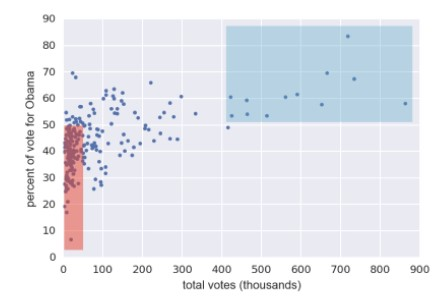

In [17]:
## Hình minh họa Image(fig1, height, width)

To generate a `scatter plot`, we plot the data as points by setting the marker and linestyle keyword arguments of plt dot plot. (And of course we label the axes!) So, we have exposed another` graphical EDA technique`: *`scatter plots! We would like to have a summary statistic to go along with the information we have just gleaned from the scatter plot`*. 

We want a number that summarizes how Obama's vote share varies with the total vote count.

#### Covariance
One such statistic is the covariance. To understand where it comes from, let's annotate the scatter plot with the means of the two quantities we are interested in. 

Now let's look at this data point, from Lucas County, Ohio. 

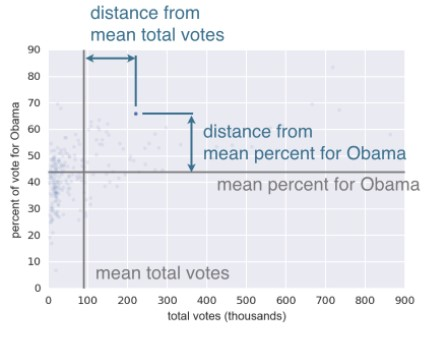

In [18]:
## Hình minh họa Image(fig1, height, width)

This data point differs from the mean vote share for Obama, and the mean total votes. We can compute these differences for each data point. The covariance is the mean of the product of these differences. 
$$ \displaystyle \text{Cov} = \dfrac{1}{n} \sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})$$
>- If `x` and `y` both tend to be above, or both below their respective means together, as they are in this data set, then the covariance is positive. This means that they are `positively correlated`: when `x` is high, so is `y`; when the county is populous, it has more votes for Obama.
>- Conversely, if x is high while y is low, the covariance is negative, and the data are `negatively correlated`, or `anticorrelated`, which is not the case for this data set.

We can compute the covariance using built-in NumPy functions you will use in the exercises. However, if we want to have a more generally applicable measure of how two variables depend on each other, we want it to be dimensionless, that is to not have any units.
#### Pearson correlation coefficient
So, we can divide the `covariance` by the standard deviations of the `x` and `y` variables. This is called the Pearson correlation `coefficient`, usually denoted by the Greek letter `rho` $\rho$.
$$ \rho = \dfrac{\text{Cov}(X,Y)}{\sqrt{\text{Var}X \cdot \text{Var}Y}} $$
>- It is a comparison of the variability in the data due to codependence (the covariance) to the variability inherent to each variable independently (their standard deviations).
>- Conveniently, it is dimensionless and ranges from -1 (for `complete anticorrelation`) to 1 (for `complete correlation`).
>- A value of `zero means` that there is **no correlation** at all between the data, as shown in the plot on the upper left. Data with intermediate values are shown on the other plots. 

As you can see, the Pearson correlation coefficient is a good metric for correlation between two variables.

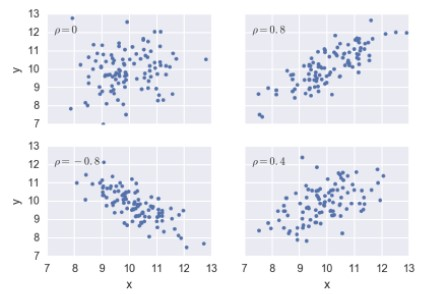

In [19]:
## Hình minh họa Image(fig1, height, width)

### 4.2. PRACTICES.
#### Exercise 4.2.1. Scatter plots
When you made bee `swarm plots`, `box plots`, and `ECDF` plots in previous exercises, you compared the `petal lengths` of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's `Iris versicolor` flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be `correlated`.

For your reference, the code used to produce the scatter plot in the video is provided below:

        _ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
        _ = plt.xlabel('total votes (thousands)')
        _ = plt.ylabel('percent of vote for Obama')
#### SOLUTION.

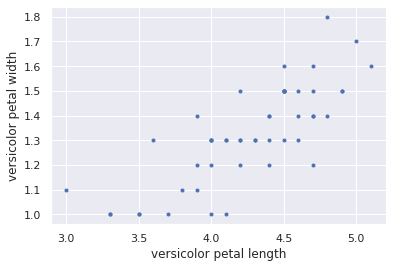

In [20]:
versicolor_petal_width = iris['data'][50:100, -1]
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width,
             marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('versicolor petal length')
_ = plt.ylabel('versicolor petal width')

# Show the result
plt.show()

#### Exercise 4.2.2. Variance and covariance by looking
Consider four scatter plots of $x-y$ data, appearing to the right. 

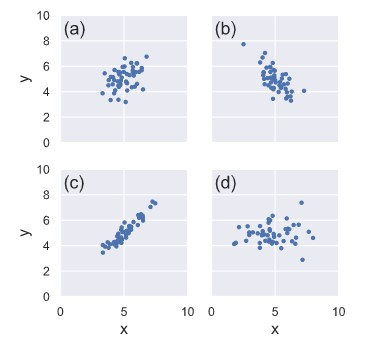

In [21]:
## Hình minh họa Image(fig1, height, width)

Which has, respectively, `the highest variance in the variable $x$`, `the highest covariance`, and `negative covariance`?

>- A. a, c, b
>- B. d, c, a
>- C. d, c, b
>- D. d, d, b

#### Answers & explaination.
>- A. Wrong!! Look at the spread in the x-direction in the plots. The largest spread corresponds to the largest variance.
>- B. Wrong!! Negative covariance means that when x is high, y is low, and vice versa.
>- **C. Correct!!**
>- D. Wrong!! Remember, having a large variance does not mean the covariance is large.

#### Exercise 4.2.3. Computing the covariance
The covariance may be computed using the Numpy function `np.cov()`. For example, we have two sets of data `x` and `y`, `np.cov(x, y)` returns a `2D array` where entries `[0,1]` and `[1,0]` are the covariances. Entry `[0,0]` is the variance of the data in `x`, and entry `[1,1]` is the variance of the data in `y`. This `2D output array` is called the `covariance matrix`, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.

In [22]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


#### Exercise 4.2.4. Computing the Pearson correlation coefficient
As mentioned in the theory, the Pearson correlation coefficient, also called the `Pearson r`, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries `[0,0]` and `[1,1]` are necessarily equal to 1 (can you think about why?), and the value we are after is entry `[0,1]`.

In this exercise, you will write a function, `pearson_r(x, y)` that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of `I. versicolor`.

Again, we include the `scatter plot` you generated in a previous exercise to remind you how the petal width and length are related.
#### SOLUTION.

In [23]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
